# 1] Import Libraries

In [7]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# 2] Import Datasets

In [3]:
delivery_time_data=pd.read_csv("delivery_time.csv")
delivery_time_data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# 3]Data Understanding

In [8]:
delivery_time_data.shape

(21, 2)

In [9]:
delivery_time_data.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [10]:
delivery_time_data.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [38]:
delivery_time_data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


# Inference

1)The shape of the data set is (21,2)

2)There is no null value and data types are assigned correctly

3)There is no need to do data cleaning process

# 4] Assumptions Check

## Linearity check

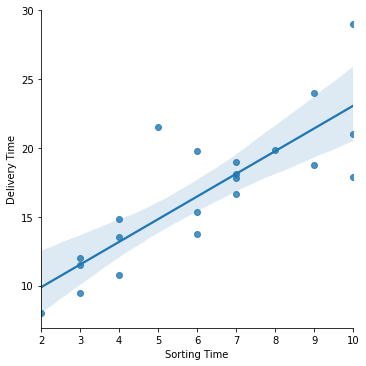

In [15]:
sns.lmplot(y='Delivery Time',x='Sorting Time',data=delivery_time_data)
plt.show()

## Normality Check

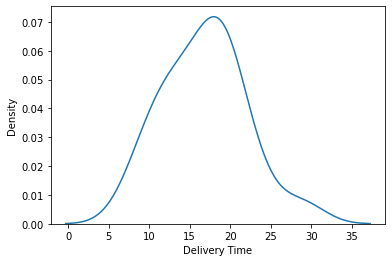

In [17]:
sns.distplot(a=delivery_time_data['Delivery Time'],hist=False)
plt.show()

In [40]:
delivery_time_data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


# Inference

1)From the above plots its is clear that the input and output data are almost linear.

2)From the correlation table, it is clear that the strength of correlation is good.

3)since, there is only one input,multicollinearity doesn't occur.

Hence we can use built linear regression model

# 5] Model Building

In [18]:
import statsmodels.formula.api as smf

In [32]:
x=delivery_time_data[['Sorting Time']]
y=delivery_time_data[['Delivery Time']]

In [33]:
linear_model=smf.ols(formula='y~x',data=delivery_time_data).fit()

In [34]:
linear_model.params

Intercept    6.582734
x            1.649020
dtype: float64

# 6] Model Evaluation

In [35]:
y_pred=linear_model.predict(x)

In [36]:
from sklearn.metrics import mean_squared_error,r2_score
print('Mean Squared Error is  :',mean_squared_error(y,y_pred))
print('R2 score is            :',r2_score(y,y_pred))

Mean Squared Error is  : 7.793311548584062
R2 score is            : 0.6822714748417231


# Inference

For a better model, the mean sqaure value should be close to zero, and R2 score should be close to 1